_La base des TPs pour le cours "Analyse de données massives 2" a été prise du cours en ligne "Open Machine Learning Course" (https://mlcourse.ai/, __auteur Yury Kashnitsky__)_ 

# <center> TP 1 : Analyse exploratoire et analyse visuelle de données avec la librairie Pandas et Seaborn

##  <center> Analyse des données de maladies cardiovasculaires

Pour vous entraîner avec les librairies Pandas et Seaborn, et aussi l’AED (Analyse Exploratoire de Données), vous pouvez remplir les lignes ci-dessous où vous analyserez un ensemble de données sur les maladies cardiovasculaires.

### Problème

Prédire la présence ou l'absence de maladie cardiovasculaire (MCV) en utilisant les résultats de l'examen du patient.

### Description des données

Il existe 3 types de caractéristiques d'entrée:

- *Objectives*: informations factuelles;
- *Examinées*: résultats d'un examen médical;
- *Subjectives*: informations données par le patient.

La description des données en anglais :

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

Toutes les valeurs du dataset ont été collectées au moment de l'examen médical.

# Partie 1. Analyse préliminaire des données

Tout d'abord, nous allons initialiser l'environnement:

**Ex.1 : Importez tout les bibliothèques nécessaires : `pandas`, `numpy` et `seaborn`**

In [2]:
# You code here
import pandas as pd
import numpy as np
import seaborn as sns

Configurons les bibliothèques `seaborn` and `matplotlib` pour l'analyse visuelle :

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

**Ex.2 : Chargez les données (en utilisant la méthode `read_csv`) du lien `url` indiqué ci-dessous, et affichez les 5 premières lignes en utilisant la méthode `head`:**

In [4]:
url = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/mlbootcamp5_train.csv"

# You code here
df=pd.read_csv(url, sep=';') #on precise separateur ';'
df.head()                    # On regarde l'allure des données 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Ex.3 : Examinez les données avec la methode `.info()` et répondez aux questions :**
1. Quelle est la dimensionnalité des données ? 
2. Quels sont les noms et les types de caractéristiques présentées ? 
3. Combien il y a des caractéristiques avec données manquantes `null` ?

In [5]:
# You code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


# **Reponse:**
1) On a un tableau (une table). Les données sont donc bi-dimentionelle.

2) Les caractéristiques sont tous des données numéric de type entiers (int) ou décimal (float) pour un seu

3) Toutes les données sont complètes == pas de données manquante null (70000 in every row)

Il serait instructif de jeter un coup d'oeil aux valeurs de nos variables.

Convertissons les données au format *long* et affichons le nombre de valeurs des entités catégoriques en utilisant [`factorplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html).

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


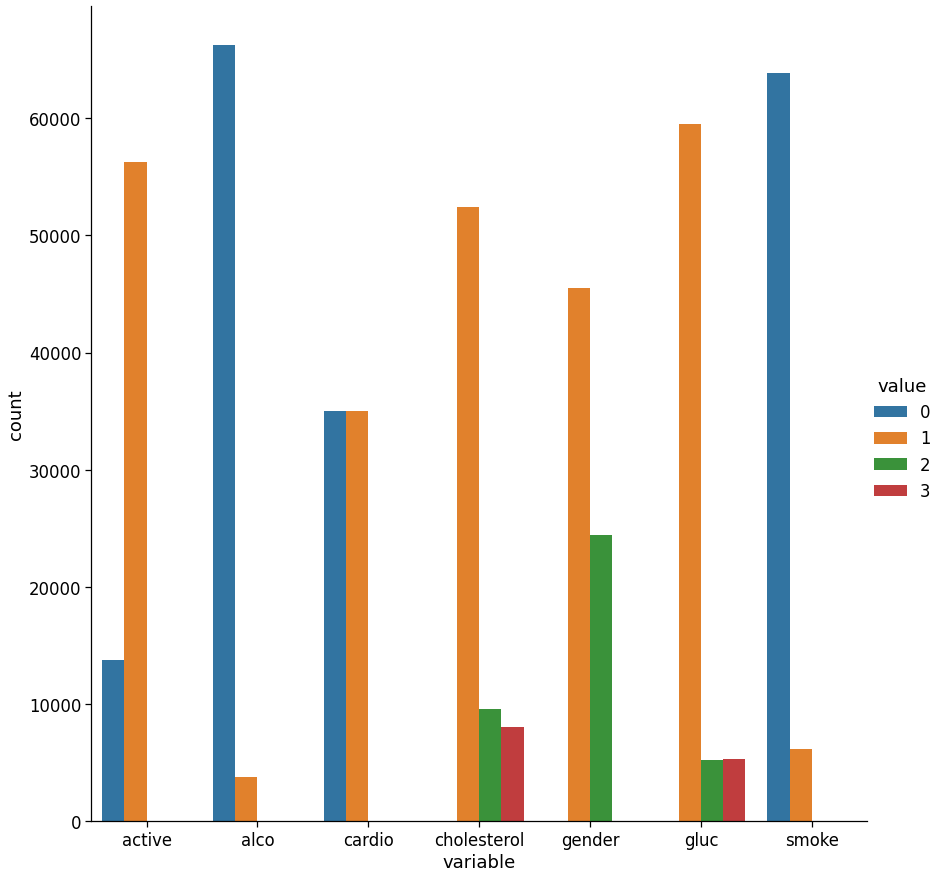

In [6]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

Nous pouvons voir que les classes cibles sont équilibrées. C'est génial !

Separons l'ensemble des données selon les valeurs cibles. Peut-on déjà repérer la caractéristique la plus significative simplement en regardant les graphiques ?

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


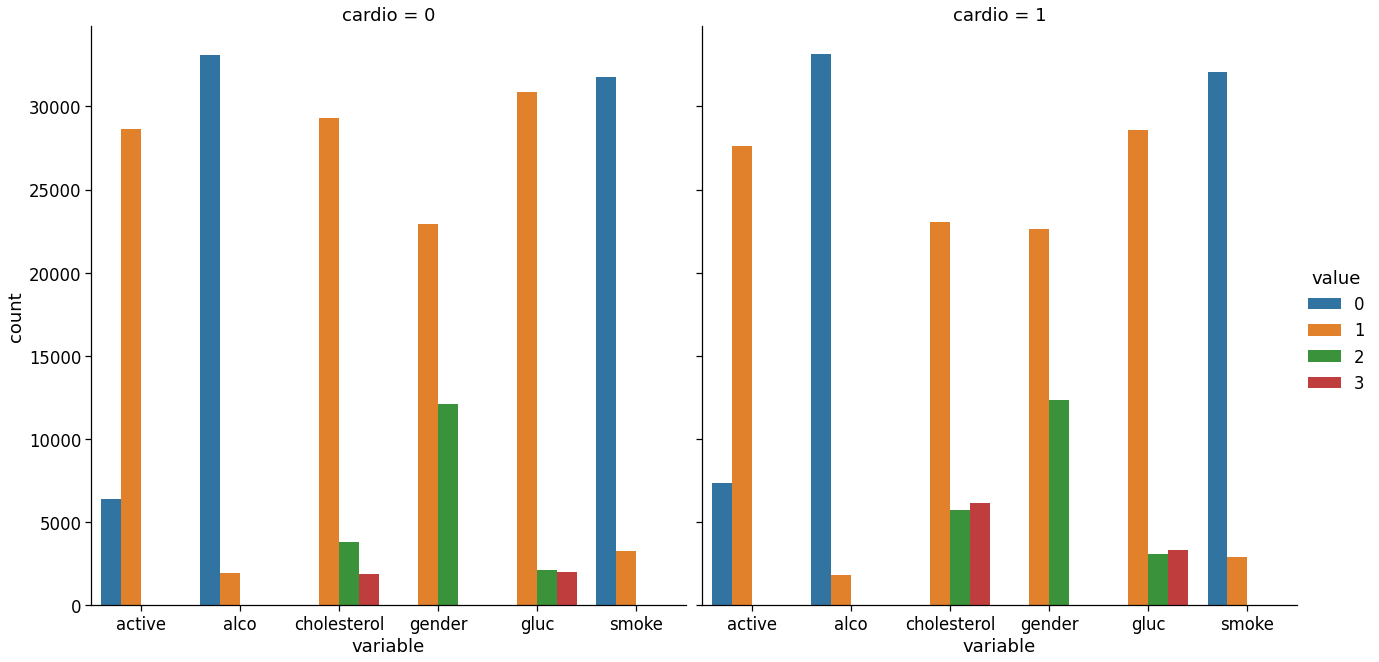

In [7]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

On peut voir que la distribution des niveaux de cholestérol et de glucose diffère grandement par la valeur de la variable cible. Est-ce une coïncidence?

Maintenant, calculons quelques statistiques pour les valeurs uniques de la caracteristique:

In [8]:
print("All features unique values : \n")
print("\t", 10 * '-')
for c in df.columns:
    n = df[c].nunique()
    print("\t", c)
    if n <= 3:
        print("\t", n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print("\t", n)
    print("\t", 10 * '-')

All features unique values : 

	 ----------
	 id
	 70000
	 ----------
	 age
	 8076
	 ----------
	 gender
	 2 [(1, 45530), (2, 24470)]
	 ----------
	 height
	 109
	 ----------
	 weight
	 287
	 ----------
	 ap_hi
	 153
	 ----------
	 ap_lo
	 157
	 ----------
	 cholesterol
	 3 [(1, 52385), (2, 9549), (3, 8066)]
	 ----------
	 gluc
	 3 [(1, 59479), (2, 5190), (3, 5331)]
	 ----------
	 smoke
	 2 [(0, 63831), (1, 6169)]
	 ----------
	 alco
	 2 [(0, 66236), (1, 3764)]
	 ----------
	 active
	 2 [(0, 13739), (1, 56261)]
	 ----------
	 cardio
	 2 [(0, 35021), (1, 34979)]
	 ----------


**Finalement, nous avons:**
- 5 caractéristiques numériques (hors *id*);
- 7 caractéristiques catégoriques;
- 70000 enregistrements au total.

## 1.1. Observations basiques

**Ex. 4 : Combien d'hommes et de femmes sont présents dans cet ensemble de données ?** 

Les valeurs de la caractéristique `gender` n'ont pas été données (c'est pas clair que "1" représente les femmes ou les hommes) - déterminez-le en analysant la taille, en supposant que les hommes sont plus grands en moyenne.

In [9]:
# You code here
meanHeight=df['height'].mean()
print("taille moyenne du groupe: ",meanHeight)
print(df.groupby(['gender'])['height'].describe(percentiles=[]))

#D'apres les résultats, le groupe 1 a une taille inferrieur au groupe 2 (moyenne et min plus basse bien que exception pour max). 
#Le groupe 1 représente donc les femmes qui sont plus petite que les hommes.

taille moyenne du groupe:  164.35922857142856
          count        mean       std   min    50%    max
gender                                                   
1       45530.0  161.355612  7.052726  55.0  161.0  250.0
2       24470.0  169.947895  7.228895  65.0  170.0  207.0


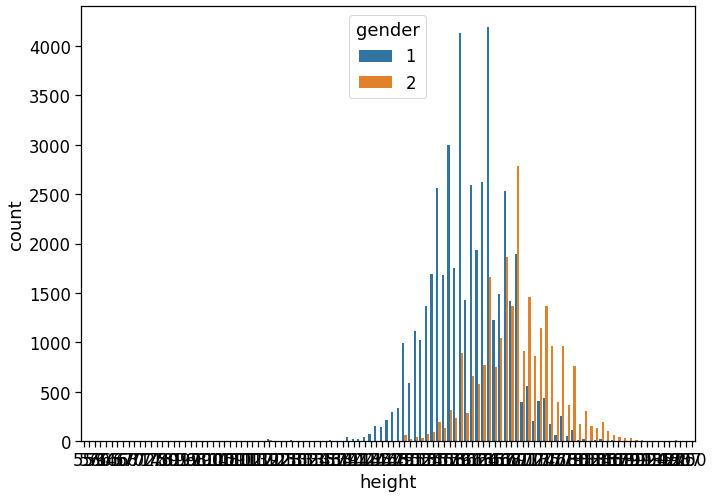

In [10]:
#Autre maniere de le voir, graphic --> on a des tailles plus faible pour groupe 1 (commence avant).
sns.countplot(x='height',hue='gender', data=df);

**Ex. 5 : Quel `gender` déclare le plus souvent consommer de l'alcool - hommes ou femmes ?**

2    2603
1    1161
Name: gender, dtype: int64

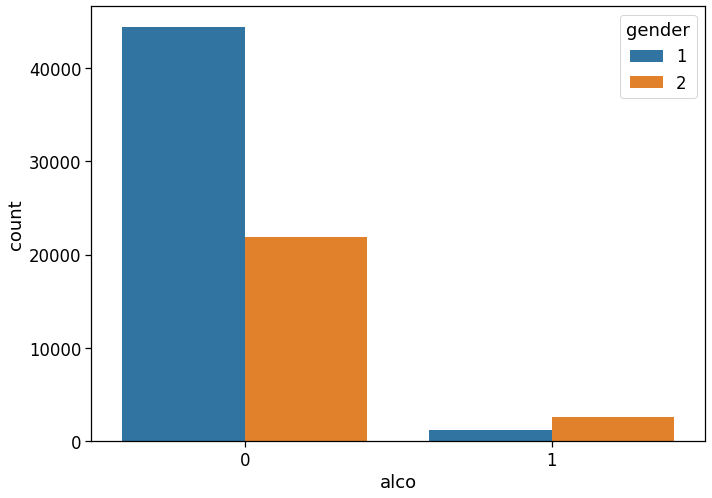

In [11]:
# You code here
sns.countplot(x='alco',hue='gender', data=df);
df[df['alco']==1] ['gender'].value_counts()

#Ce sont les hommes (groupe 2) qui declare le plus boire de l'alcool. Detaille dans tableau: 2600 hommes contre 1160 femmes.

**Ex. 6 : Quelle est la différence entre les pourcentages de fumeurs chez les hommes et les femmes (arrondi) ?**

In [12]:
# You code here
df[df['smoke']==1] ['gender'].value_counts(normalize=True)
#Encore une fois, ont a un plus grand pourcentage d'hommes (groupe 2) qui fument. 86,8% contre 13,1% pour les femmes.

2    0.868212
1    0.131788
Name: gender, dtype: float64

**Ex. 7 : Quelle est la différence entre les valeurs médianes d'âge chez les fumeurs et les non-fumeurs (en mois, arrondies) ?** 

Vous devrez déterminer les unités de la caractéristique `age_in_month` dans cet ensemble de données.

In [ ]:
# You code here
df['age_in_month']=df['age']/30 #on fait un colone age in month avc (age_en_jour)/30 (un mois)
print(df['age_in_month'].head())
print(df['age_in_month'].describe())

In [ ]:
print("mediane d'age pour les femmes non-fumeuse:")
print(df[(df['gender'] == 1) & (df['smoke'] == 0)]['age_in_month'].median()) #groupe femmes non fumeuse
print("mediane d'age pour les femmes fumeuse:")
print(df[(df['gender'] == 1) & (df['smoke'] == 1)]['age_in_month'].median()) #groupe femmes fumeuse

In [ ]:
print("mediane d'age pour les hommes non-fumeur:")
print(df[(df['gender'] == 2) & (df['smoke'] == 0)]['age_in_month'].median()) #groupe hommes non fumeur
print("mediane d'age pour les hommes fumeur:")
print(df[(df['gender'] == 2) & (df['smoke'] == 1)]['age_in_month'].median()) #groupe hommes fumeur

## 1.2. Les cartes de risque (Bonus)

Sur le site de la société européenne de cardiologie [l'échelle de SCORE ](https://www.escardio.org/Education/Practice-Tools/CVD-prevention-toolbox/SCORE-Risk-Charts) est fournie. Elle est utilisée pour calculer le risque de décès d'une maladie cardiovasculaire (MCV) dans les 10 prochaines années :
<img src=https://habrastorage.org/webt/ik/gx/hr/ikgxhr3w1vzqihgitgrbdorfb14.png width=60%>

Jetons un coup d'oeil au rectangle supérieur droit, qui montre un sous-ensemble d'hommes fumeurs âgés de 60 à 65. (Il n'est pas évident, mais les valeurs de la figure représentent la limite supérieure).

Nous voyons la valeur 9 dans le coin inférieur gauche du rectangle et 47 dans le coin supérieur droit. Cela signifie que, pour les personnes de ce groupe de sexe-âge dont la pression systolique est inférieure à 120, le risque d'une MCV est estimé à 5 fois plus faible que pour ceux avec la pression dans l'intervalle [160,180].

**Ex. 8 (Bonus) : Calculez le même ratio en utilisant nos données.**

Clarifications :
- Calculez la fonction `age_years` - arrondissez l'âge au nombre d'années le plus proche. Et pour cette tâche, sélectionnez uniquement les personnes de 60 à 64 ans inclusivement.
- Les catégories de taux de cholestérol diffèrent entre la figure et notre ensemble de données. La conversion pour la fonction `cholestérol` est la suivante: 4 mmol/l $\rightarrow$ 1; 5-7 mmol/l $\rightarrow$ 2; 8 mmol/l $\rightarrow$ 3.

In [14]:
# You code here
df['age_years']=(df['age_in_month']/12).astype('int64') #on creer une colone age par ans (en la mettant en entier ==int)
df['age_years'].head() 
older=df[(df['age_years']>=60) & (df['age_years']<=64)]
print(older)

0    51
1    56
2    52
3    48
4    48
Name: age_years, dtype: int64

**Ex.9 (Bonus) : Calculez la fraction des personnes atteintes d'une MCV pour les deux segments décrits ci-dessus. Quel est le rapport de ces deux fractions?**

In [16]:
# You code here

## 1.3. Analyse du BMI (Body Mass Index)

**Ex. 10 : Créez une nouvelle caracteristique – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)).**

Pour ce faire, divisez le poids en kilogrammes par le carré de la taille en mètres. On dit que les valeurs normales du BMI sont de 18,5 à 25.

In [17]:
# You code here
df['height_cm']=df['height']/100
df['height_cm'].head()

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
Name: height_cm, dtype: float64

In [18]:
df['BMI']=df['weight']/(df['height_cm']* df['height_cm'])
df['BMI'].head()

0    21.967120
1    34.927679
2    23.507805
3    28.710479
4    23.011177
Name: BMI, dtype: float64

**Ex. 11 : Choisissez les expressions correctes et argumentez votre choix :**

1. La medianne du BMI dans les données se situe dans la plage des valeurs normales du BMI.
2. Le BMI des femmes est en moyenne plus élevé que celui des hommes.
3. Les personnes en bonne santé ont, en moyenne, un BMI plus élevé que les personnes atteintes d'une MCV.
4. Pour les hommes en bonne santé qui ne boivent pas, le BMI est plus proche de la norme que pour les femmes en bonne santé qui ne boivent pas.

In [19]:
df['BMI'].describe()
#Faux, la mediane BMI n'est pas dans l'intervale [18,5:25]. Elle n'est donc pas conciderer comme normale

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

In [20]:
# You code here
print("Infos BMI des femmes")
print(df[df["gender"]==1]['BMI'].describe())

print("Infos BMI des hommes")
print(df[df["gender"]==2]['BMI'].describe())
#Vraie, la moyenne de BMI des femmes est un peu plus elevé que pour les hommes

Infos BMI des femmes
count    45530.000000
mean        27.987583
std          6.495638
min          8.001829
25%         23.875115
50%         26.709402
75%         31.044558
max        298.666667
Name: BMI, dtype: float64
Infos BMI des hommes
count    24470.000000
mean        26.754442
std          5.162752
min          3.471784
25%         23.781213
50%         25.910684
75%         29.043709
max        180.678074
Name: BMI, dtype: float64


In [21]:
print("Infos BMI personnes saines")
print(df[df["cardio"]==0]['BMI'].describe())

print("Infos BMI des autres")
print(df[df["cardio"]==1]['BMI'].describe())
#Faux, les personne avec maladies cardio vasculaire ont une BMI plus eleve

Infos BMI personnes saines
count    35021.000000
mean        26.548175
std          5.606469
min          7.022248
25%         23.388687
50%         25.476660
75%         28.763971
max        237.768633
Name: BMI, dtype: float64
Infos BMI des autres
count    34979.000000
mean        28.566061
std          6.383666
min          3.471784
25%         24.489796
50%         27.471384
75%         31.555556
max        298.666667
Name: BMI, dtype: float64


# Part 2. Analyse visuelle des données

## 2.1. Visualisation de matrice de corrélation

Pour mieux comprendre les caractéristiques, vous pouvez créer une matrice des coefficients de corrélation entre les entités. 

**Ex. 12 : Creez une matrice de corrélation en utilisant [`heatmap()`](http://seaborn.pydata.org/generated/seaborn.heatmap.html). Vous pouvez aussi créer la matrice en utilisant les outils standard 'pandas' avec les paramètres par défaut.**

In [ ]:
# You code here
matrice=sns.heatmap(df)

**Ex. 13 : Quelle paire de caractéristiques a la plus forte corrélation de Pearson avec la caractéristique `gender` ?**

In [35]:
# You code here
#print (df[['cholesterol','gluc','smoke','alco','active','cardio',]].corrwith(df['gender']))
print (df.corrwith(df['gender']))

id              0.003502
age            -0.022811
gender          1.000000
height          0.499033
weight          0.155406
ap_hi           0.006005
ap_lo           0.015254
cholesterol    -0.035821
gluc           -0.020491
smoke           0.338135
alco            0.170966
active          0.005866
cardio          0.008109
age_in_month   -0.022811
age_years      -0.022936
height_cm       0.499033
BMI            -0.096529
dtype: float64


IndexError: ignored

## 2.2. Répartition de la taille des hommes et des femmes

De notre exploration des valeurs uniques plus tôt, nous savons que le genre est codé par les valeurs *1* et *2*. Même si vous ne connaissez pas le mappage de ces valeurs au genre, vous pouvez le comprendre graphiquement en regardant les valeurs moyennes de la taille et du poids pour chaque valeurs de la fonction `gender`.

**Ex. 14 : Créez un violinplot pour la hauteur et le genre en utilisant [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Utilisez les paramètres :**
- `hue` pour diviser par genre;
- `scale` pour évaluer le nombre d'enregistrements pour chaque sexe.

Pour que le tracé soit rendu correctement, vous devez convertir votre `DataFrame` au format `long` en utilisant la fonction `melt()` de `pandas`. Voici [un example](https://stackoverflow.com/a/41575149/3338479) pour votre référence.

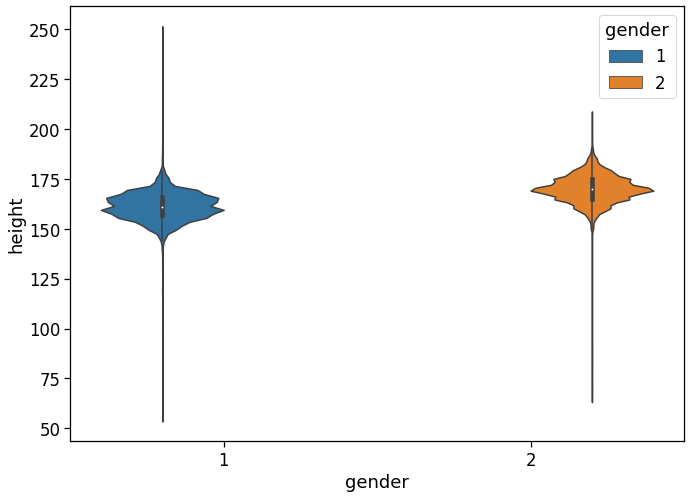

In [24]:
# You code here
violinPlot=sns.violinplot(x=df['gender'], y='height',hue=df['gender'], data=df, scale='count')

#Autre methode sans le count ==> violinPlot=sns.violinplot(x=df['gender'],y=df['height'])

## 2.3. Age

Auparavant, nous calculions l'âge des répondants en années au moment de l'examen.

**Ex. 15 : Creez un `count plot` en utilisant [`countplot()`](http://seaborn.pydata.org/generated/seaborn.countplot.html) avec l'age sur l'axe *X* et le nombre de personnes sur l'axe *Y*.**

En définitive, votre graphique devrait avoir deux colonnes pour chaque âge, correspondant au nombre de personnes pour chaque classes *cardio* de cet âge.

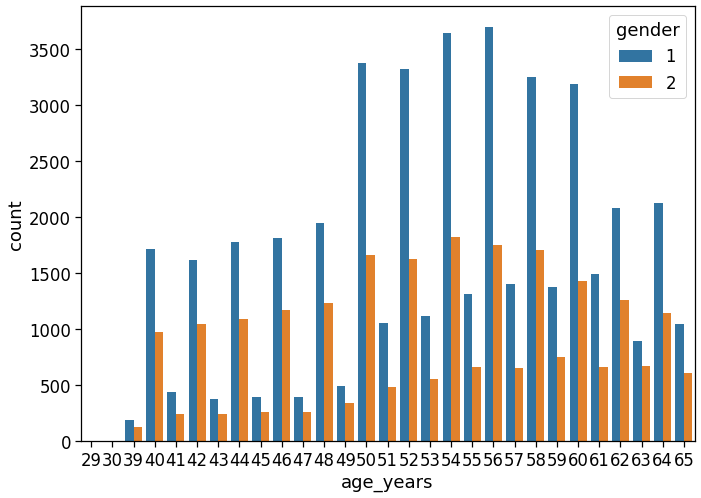

In [32]:
# You code here
countPlot=sns.countplot(x=df["age_years"], hue=df["gender"])
plt.show()

**Ex. 16 : Quel est le plus petit âge auquel le nombre de personnes atteintes d'une MCV dépasse le nombre de personnes sans MCV ?**

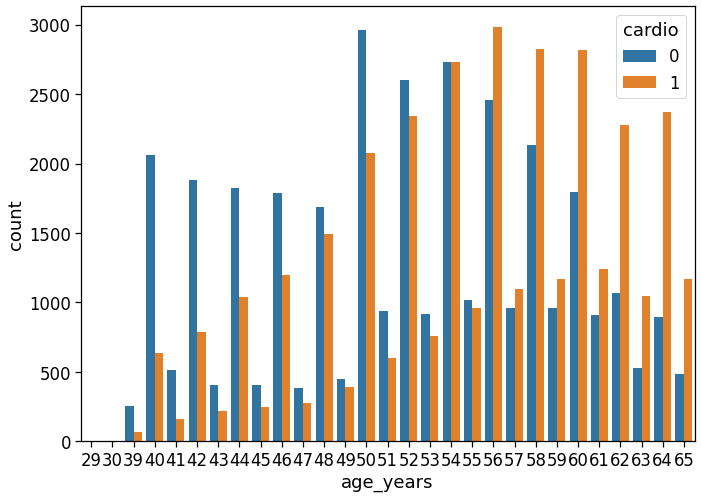

In [33]:
# You code here
countPlot=sns.countplot(x=df["age_years"], hue=df["cardio"])
plt.show()
# C'est a partir de 56ans qu'on commenece a vaoir plus de persone avec MCV que saine pour le meme age.